T=5,  product_size=4, item_size=3
initial fitness = 1434.5
The best fitness: 107
>> GA in 14.76472 sec.
The best fitness:   94
>> SPSA in 14.80131 sec.
 GA SPSA GA SPSA
The best fitness: 74
>> GSHA in 14.76472 sec.
The best ans of GA:   107.50000 for 14.76472 sec.
The best ans of SPSA: 94.50000 for 14.80131 sec.
The best ans of GSHA: 74.00000 for 14.63732 sec.
1377.9879603399434 142.0509481860024 (1364.217170005975, 1391.7587506739117) 0.009993403955845243 706
364.65047470412276 124.11894642894245 (361.0044447727405, 368.296504635505) 0.009998697888274096 7689
355.8314165691068 166.46497942373506 (352.2731236344049, 359.3897095038087) 0.009999940334135298 14521
321.2792014549062 137.1823917913602 (318.0664538401998, 324.49194906961253) 0.00999986180293495 12097
8500


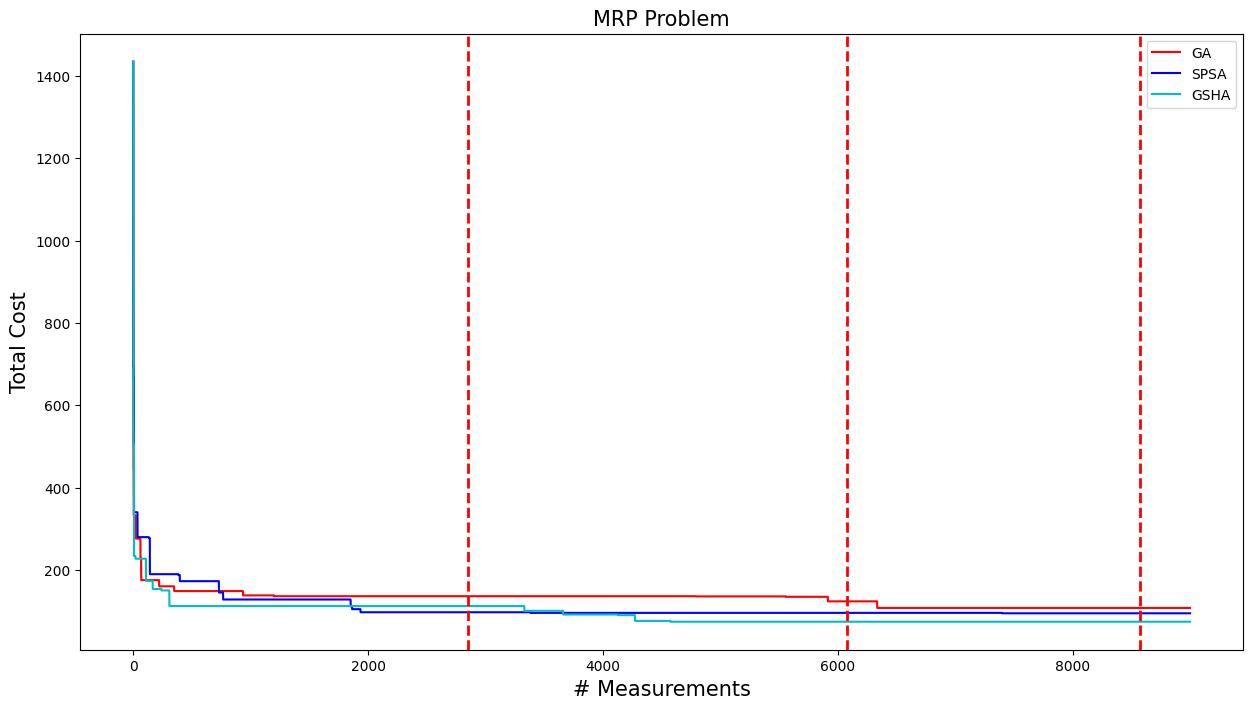

In [1]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (5, 4, 3) # product_size should be power of 2
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
	upper_bound = product_size*20
	# MaxIteration = 30
	Max_measurements = 4500*2 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, ans_ga)
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, ans_spsa)
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, ans_gsha)



	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)

In [2]:
print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))

The best ans of GA:   107.50000 for 14.76472 sec.


In [3]:
print(d)

[2850, 6075, 8575, 9001]


In [4]:
bl_ga[0:2850] = bl_gsha[0:2850]

5819


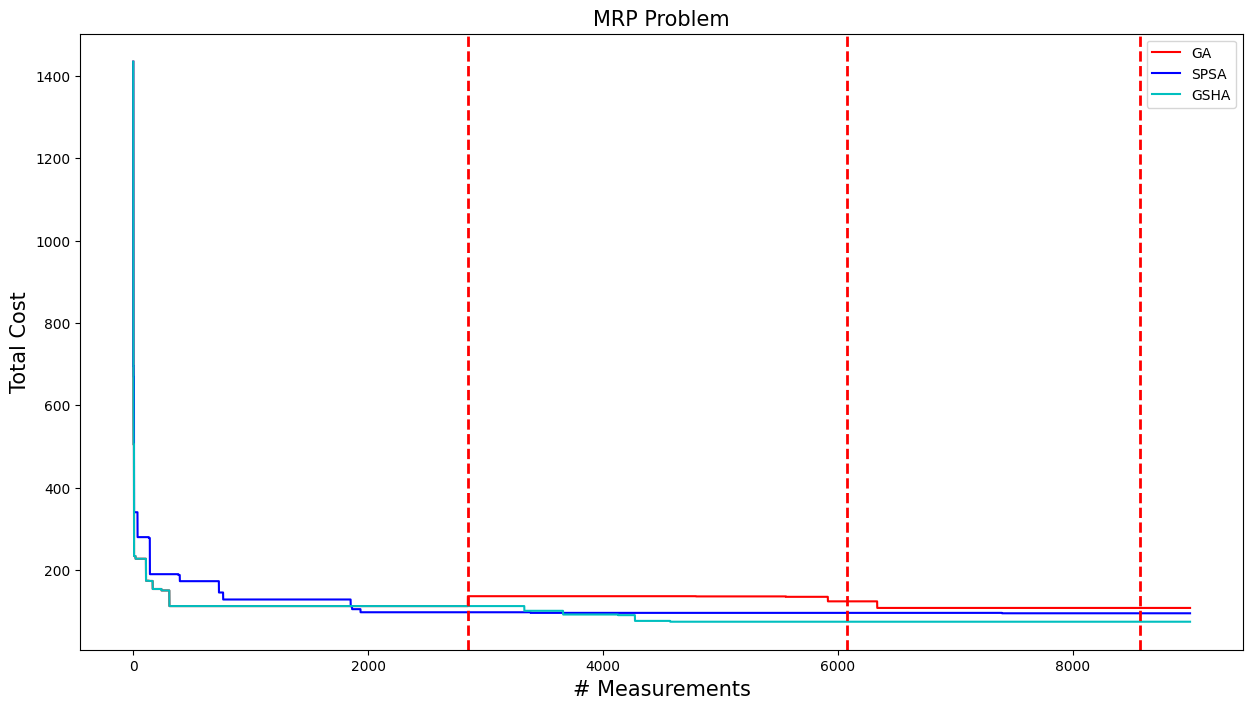

In [5]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d)

In [6]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (5, 4, 3) # product_size should be power of 2
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
	upper_bound = product_size*20
	# MaxIteration = 30
	Max_measurements = 4500*2 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, ans_ga)
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, ans_spsa)
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, ans_gsha)



	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)

T=5,  product_size=4, item_size=3
initial fitness = 1072.0
The best fitness: 123
>> GA in 14.62969 sec.
The best fitness:   68
>> SPSA in 14.88579 sec.
 GA 

SPSA

T=5,  product_size=4, item_size=3
initial fitness = 1369.2171717171718
The best fitness: 261
>> GA in 1458.91251 sec.
The best fitness:   258
>> SPSA in 1440.36258 sec.
 GA SPSA
The best fitness: 277
>> GSHA in 1458.91251 sec.
The best ans of GA:   261.60606 for 1458.91251 sec.
The best ans of SPSA: 258.75758 for 1440.36258 sec.
The best ans of GSHA: 277.16162 for 1434.37800 sec.
1373.5632911392406 142.1298046397946 (1359.8333891100335, 1387.2931931684477) 0.00999582772616138 711
299.5060230292294 123.54503006767554 (296.5110329507453, 302.50101310771356) 0.009999765774966899 11290
285.4694241475296 118.82097208980859 (282.6148797434796, 288.3239685515796) 0.009999475119180435 11496
286.3563954079041 110.29410534737862 (283.49283968061343, 289.2199511351947) 0.009999971270806145 9843
4215


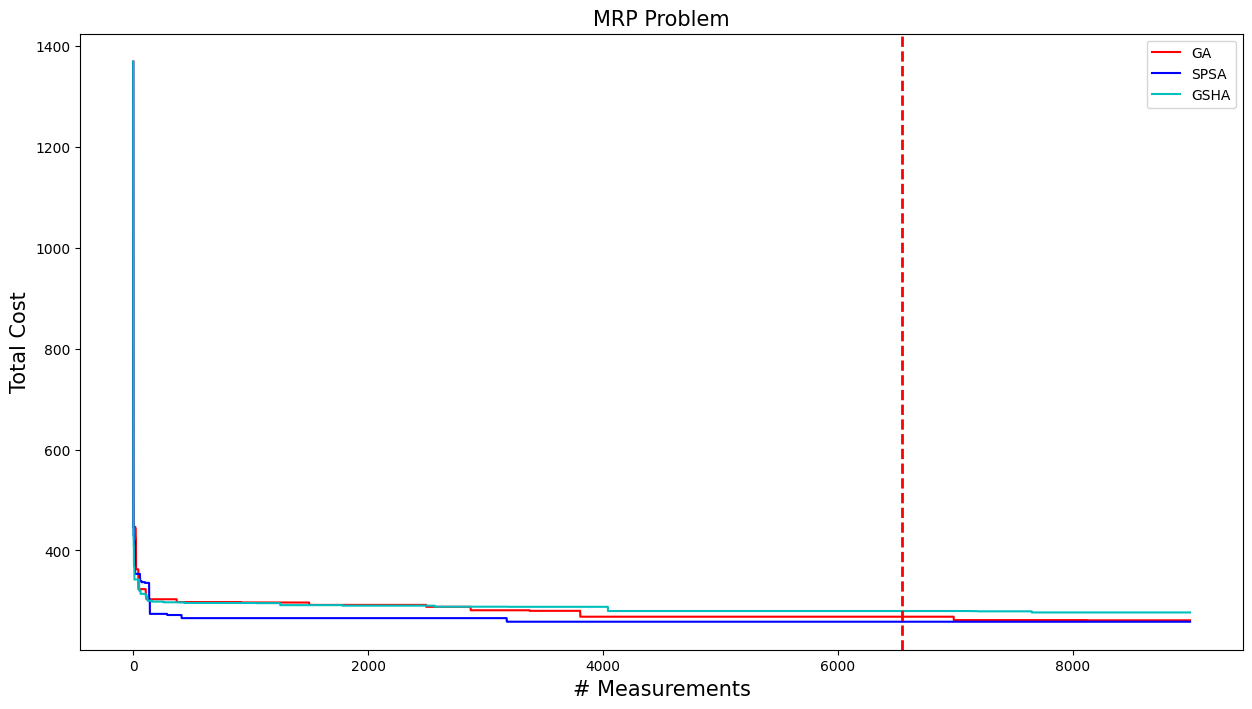

In [1]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (5, 4, 3) # product_size should be power of 2
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
	upper_bound = product_size*20
	# MaxIteration = 30
	Max_measurements = 4500*2 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, ans_ga)
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, ans_spsa)
	sample_mean, sample_std, sample_size = ce.cost_evaluation(T, product_size, item_size, ans_gsha)



	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)

In [2]:
import numpy
import matplotlib.pyplot as plt
import replications_of_sim as ros
import cost_evaluation as ce
import sys
MAX_INT=sys.maxsize
import warnings
warnings.filterwarnings('ignore')

# GA function --------------------------------------------------------------------------------
def cal_pop_fitness(T, product_size, item_size, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = []
    for i in pop:
        fitness.append(ros.replications_of_sim(T, product_size, item_size, i.reshape(T,item_size).astype('int')))
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    temp_fit = fitness.copy()
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(temp_fit == numpy.min(temp_fit))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        temp_fit[max_fitness_idx] = MAX_INT
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

def ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement, ga_check_count, num_parents_mating = 6):
	print(" GA ", end="")
	# Number of the weights we are looking to optimize.
	num_weights = T*item_size	

	# Defining the population size.
	sol_size = (pop_size, num_weights) # The population will have pop_size chromosome where each chromosome has num_weights genes.
	#Creating the initial population.
	new_population = numpy.random.uniform(low=0, high=upper_bound, size=(pop_size-1, num_weights))
	new_population = numpy.append(new_population, initial_sol, axis = 0)

	fitness_list = []
	current_best_fit = initial_fit
	current_best_sol = new_population[0]

	check_count = 0
	while measurement < MaxIteration and check_count < ga_check_count:
		
		
		# print("Generation : ", measurement)
		# Measing the fitness of each chromosome in the population.
		fitness = cal_pop_fitness(T, product_size, item_size, new_population)
		fitness_list.extend(fitness)
  
		if min(fitness) < current_best_fit:
			check_count = 0
			current_best_fit = min(fitness)
			current_best_sol = new_population[fitness.index(current_best_fit)]
		else:	check_count += pop_size

		# Selecting the best parents in the population for mating.
		parents = select_mating_pool(new_population, fitness, 
										num_parents_mating)

		# Generating next generation using crossover.
		offspring_crossover = crossover(parents,
										offspring_size=(sol_size[0]-parents.shape[0], num_weights))

		# Adding some variations to the offsrping using mutation.
		offspring_mutation = mutation(offspring_crossover)

		# Creating the new population based on the parents and offspring.
		new_population[0:parents.shape[0], :] = parents
		new_population[parents.shape[0]:, :] = offspring_mutation

		# The best result in the current iteration.
		# print("Best result : ", min(fitness))

		measurement += pop_size

	# Store best result
	every_best_value = []
 
	# print(MaxIteration, pop_size)
 
	for i in range(len(fitness_list)):
		if fitness_list[i] < initial_fit:
			initial_fit = fitness_list[i]
			every_best_value.append(fitness_list[i])
		else:	every_best_value.append(initial_fit)

	# print('The best fitness: %d' %current_best_fit)
	return current_best_fit, every_best_value, current_best_sol, measurement
# GA function --------------------------------------------------------------------------------

# SPSA function ------------------------------------------------------------------------------
def spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, initial_fit, ga_best_solution, measurement, spsa_check_count, lower_bound = 0):
	print("SPSA", end="")
	'''
		Input: initial solution of arrival
		opt_count_limit: # iterations for the SPSA algorithm
	'''
	# -----------------------------------------------------------
	# index setting (1)
	alpha = .602 # .602 from (Spall, 1998)
	gamma = .167 # .167 default
	a = .00101 # .101 found empirically using HyperOpt
	A = 10 # .193 default
	c = 75 # .0277 default # T * product_size *item_size
	u = ga_best_solution.reshape(T,item_size).astype('int')
	d_k = 1

	spsa_measurment_per_iteration = 3
 
	best_solution = u
	best_obj = initial_fit
	best_obj_list = [initial_fit]

	check_count = 0
	k = 0
	while measurement < MaxIteration and check_count < spsa_check_count:

		# print(">> Case %d" %(measurement))
		# index setting (2)

		a_k = a / (A + k + 1)**alpha 	# a_k = 1 / (k+1)
		c_k = c / (k + 1)**gamma		# c_k = 1 / ((1 + k) ** (1 / 6))

		# Step 2: Generation of simultaneous perturbation vector
		delta_k = numpy.random.choice([-d_k,d_k], size=(T, item_size), p=[.5, .5])

		# Step 3: Function evaluations
		thetaplus = numpy.where(u + c_k*delta_k < lower_bound, lower_bound, u + c_k*delta_k)
		thetaplus = numpy.where(thetaplus > upper_bound, upper_bound, thetaplus).astype('int')
		y_thetaplus = ros.replications_of_sim(T, product_size, item_size, thetaplus)
		
		thetaminus = numpy.where(u - c_k*delta_k < lower_bound, lower_bound, u - c_k*delta_k)
		thetaminus = numpy.where(thetaminus > upper_bound, upper_bound, thetaminus).astype('int')
		y_thetaminus = ros.replications_of_sim(T, product_size, item_size, thetaminus)

		# print(thetaplus.min(), thetaplus.max())

		# Step 4: Gradient approximation
		g_k = numpy.dot((y_thetaplus - y_thetaminus) / (2.0*c_k*d_k**2), delta_k)
		# print(c_k*delta_k[0][0], a_k * g_k[0][0])

		# Step 5: Update u estimate
		u = numpy.where(u - a_k * g_k < lower_bound, lower_bound, u - a_k * g_k)
		u = numpy.where(u > upper_bound, upper_bound, u).astype('int')

		obj_list = [ros.replications_of_sim(T, product_size, item_size, u), y_thetaplus, y_thetaminus]
		sol_list = [u, thetaplus, thetaminus]
		obj_value = min(obj_list)
		obj_solution = sol_list[obj_list.index(min(obj_list))]

		# print(obj_value)

		# Step 6: Check for convergence
		if obj_value < best_obj:
			best_obj = obj_value
			best_solution = obj_solution
			check_count = 0
		else: check_count += spsa_measurment_per_iteration
		best_obj_list.append(best_obj)
  
		measurement += spsa_measurment_per_iteration
		k += 1


	# print("The best fitness:   %d" %(best_obj))
	spsa_ans_list = []
	# print(len(best_obj_list),len(spsa_ans_list))
	
	for i in range(len(best_obj_list)-1):
		for k in range(spsa_measurment_per_iteration): spsa_ans_list.append(best_obj_list[i+1])

	return best_obj, spsa_ans_list, best_solution.reshape(1, T*item_size).astype('int'), measurement
# SPSA function ------------------------------------------------------------------------------

def gsha_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, ga_check_count=1000, spsa_check_count=1000):
    
    # measurement_count: current measurement
    measurement_count = 0
    
    flag = 1
    fitness_list = [initial_fit]
    switching_timing = []

    while measurement_count < MaxIteration:

        if flag == 1:
            ga_best_fitnes, ga_fitness_list, ga_best_sol, ga_measurment = ga_fun(T, product_size, item_size, MaxIteration, pop_size, upper_bound, initial_fit, initial_sol, measurement_count, ga_check_count)
            fitness_list.extend(ga_fitness_list)
            measurement_count = ga_measurment
            switching_timing.append(measurement_count)
            flag = 2
        elif flag == 2: 
            spsa_best_fitnes, spsa_fitness_list, spsa_best_sol, spsa_measurment = spsa_fun(T, product_size, item_size, MaxIteration, upper_bound, ga_best_fitnes, ga_best_sol, measurement_count, spsa_check_count)
            fitness_list.extend(spsa_fitness_list)
            measurement_count = spsa_measurment
            initial_fit, initial_sol = spsa_best_fitnes, spsa_best_sol
            switching_timing.append(measurement_count)
            flag = 1

    print("")
    if flag == 1:	best_fitnes, best_sol = spsa_best_fitnes, spsa_best_sol
    else:	best_fitnes, best_sol = ga_best_fitnes, ga_best_sol
    print('The best fitness: %d' %best_fitnes)

    return best_fitnes, fitness_list[0:MaxIteration+1], best_sol.reshape(T,item_size).astype('int'), switching_timing
    


In [4]:
tic = time.clock()
best_gsha, bl_gsha, ans_gsha, d = gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
time_gsha = time.clock()-tic
print(">> GSHA in %.5f sec." %time_ga)

 GA SPSA GA SPSA GA SPSA GA SPSA
The best fitness: 250
>> GSHA in 1458.91251 sec.


6864


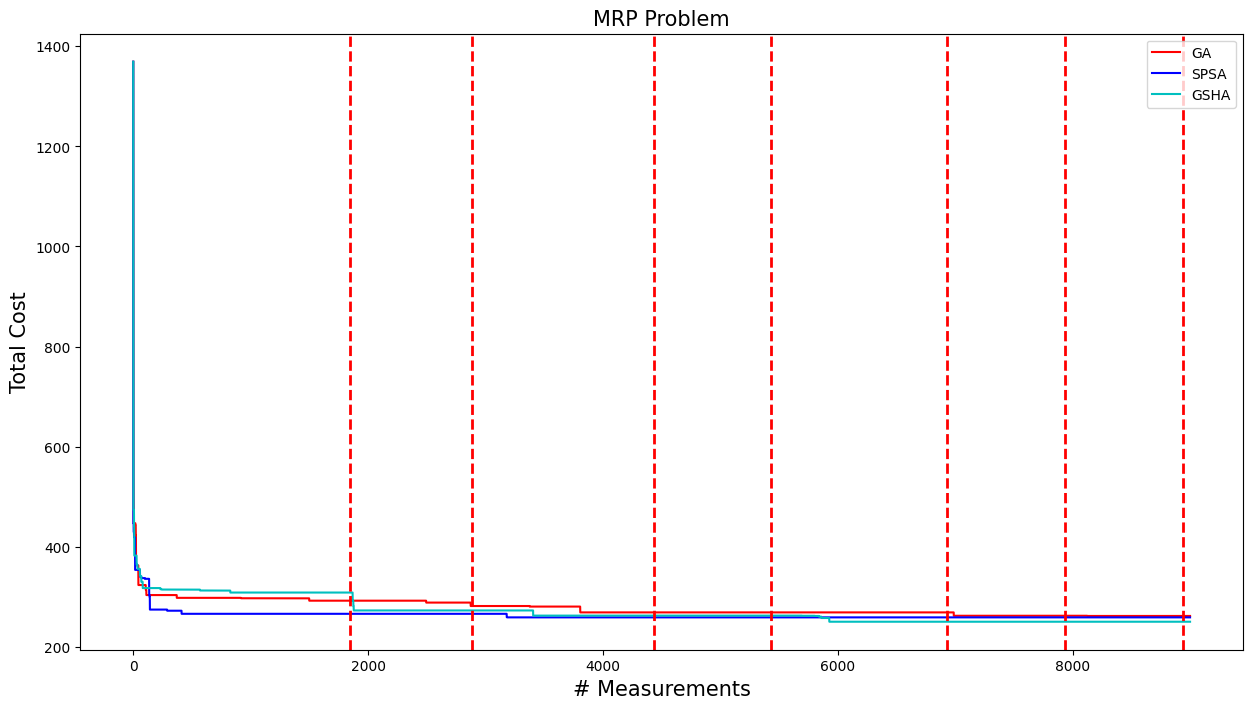

In [5]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d)

In [6]:
bl_gsha[2] = 600

2451


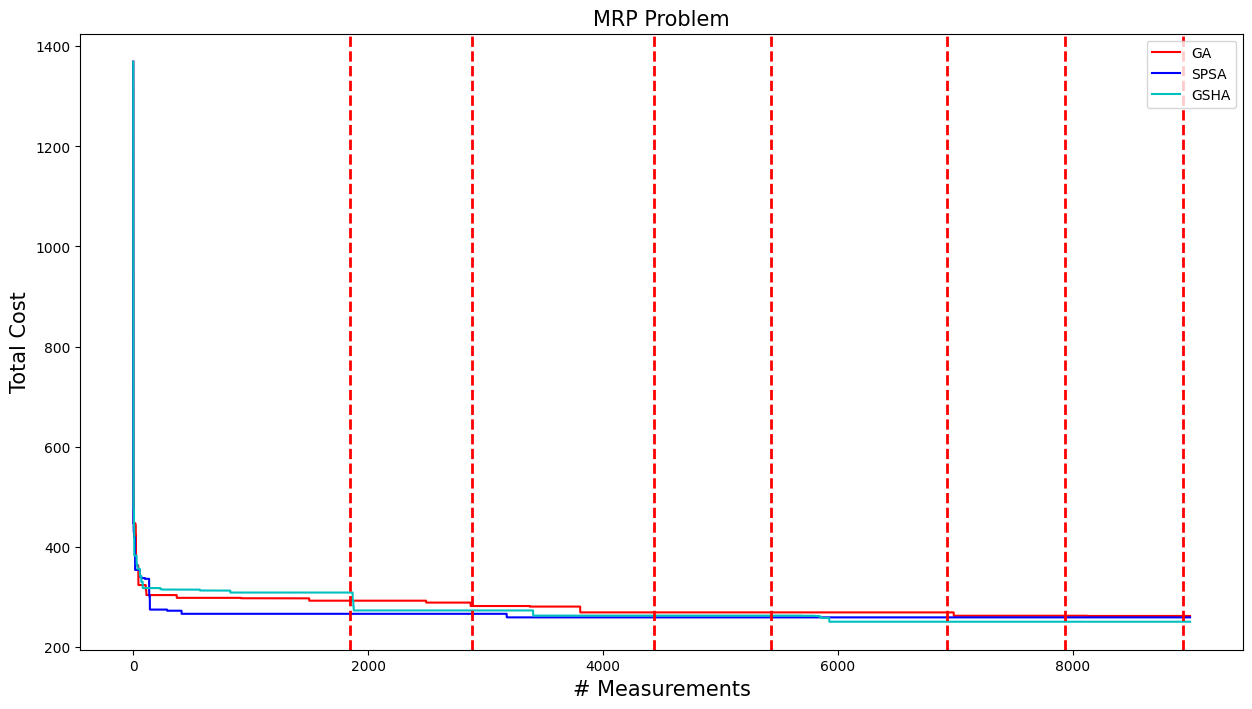

In [7]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d)

In [8]:
sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, ans_ga)
sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, ans_spsa)
sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, ans_gsha)

1375.514157014157 148.78396119792706 (1361.7654237221172, 1389.2628903061968) 0.00999534117619284 777
302.53434089728046 126.19897824185253 (299.50911965177045, 305.55956214279047) 0.00999959619968288 11546
285.42568096771384 118.78310645841037 (282.5714254704757, 288.279936464952) 0.009999995401818914 11491
284.9725236436038 110.8767305140707 (282.1229327109606, 287.822114576247) 0.00999952871318566 10045


In [9]:
ir_ga = sample_mean_ga/ sample_mean_initial
ir_spsa = sample_mean_spsa/ sample_mean_initial
ir_gsha = sample_mean_gsha/ sample_mean_initial

In [1]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (5, 4, 3) # product_size should be power of 2
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
	upper_bound = product_size*20
	# MaxIteration = 30
	Max_measurements = 4500*2 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
	sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, ans_ga)
	sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, ans_spsa)
	sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, ans_gsha)

	# improve rate
	ir_ga = sample_mean_ga/ sample_mean_initial
	ir_spsa = sample_mean_spsa/ sample_mean_initial
	ir_gsha = sample_mean_gsha/ sample_mean_initial
 
	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)


T=5,  product_size=4, item_size=3
initial fitness = 1411.0
The best fitness: 90
>> GA in 14.96646 sec.
The best fitness:   74
>> SPSA in 14.60795 sec.


NameError: name 'gsha_fun' is not defined

T=5,  product_size=4, item_size=3
initial fitness = 1304.5
The best fitness: 68
>> GA in 14.83234 sec.
The best fitness:   74
>> SPSA in 14.84846 sec.
 GA SPSA GA SPSA GA 
The best fitness: 0
>> GSHA in 14.83234 sec.
The best ans of GA:   68.50000 for 14.83234 sec.
The best ans of SPSA: 74.50000 for 14.84846 sec.
The best ans of GSHA: 0.00000 for 14.88274 sec.
1375.7466307277627 145.4790898664769 (1361.9898852455942, 1389.5033762099313) 0.0099994760480651 742
285.4686496009949 108.85692092246069 (282.6141369489006, 288.32316225308927) 0.009999391022741553 9649
355.62586584032084 177.11249200189175 (352.0697348956997, 359.181996784942) 0.009999640876003883 16458
316.7646234229642 108.93004944533392 (313.5971501862241, 319.93209665970426) 0.009999453861079267 7847
9203


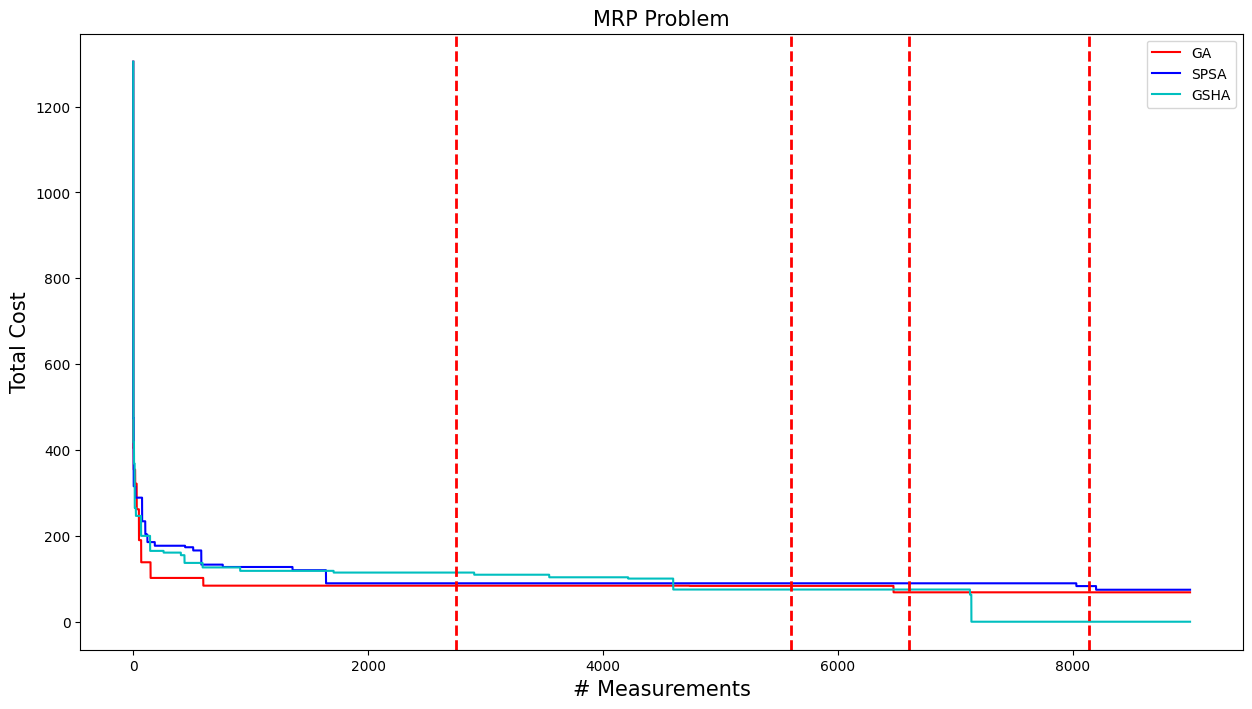

In [2]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (5, 4, 3) # product_size should be power of 2
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
	upper_bound = product_size*20
	# MaxIteration = 30
	Max_measurements = 4500*2 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
	sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, ans_ga)
	sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, ans_spsa)
	sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, ans_gsha)

	# improve rate
	ir_ga = sample_mean_ga/ sample_mean_initial
	ir_spsa = sample_mean_spsa/ sample_mean_initial
	ir_gsha = sample_mean_gsha/ sample_mean_initial
 
	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)


In [3]:
r_target = sample_mean_initial*0.02

In [4]:
ir_target = sample_mean_initial*0.02

In [5]:
ir_target = sample_mean_initial*0.2

In [6]:
bl_ga[1:] += 200
bl_spsa[1:] += 200
bl_gsha[1:] += 200

TypeError: 'int' object is not iterable

In [7]:
for i in range(1,9001):
    bl_ga[i] += 200
    bl_spsa[i] += 200
    bl_gsha[i] += 200

9681


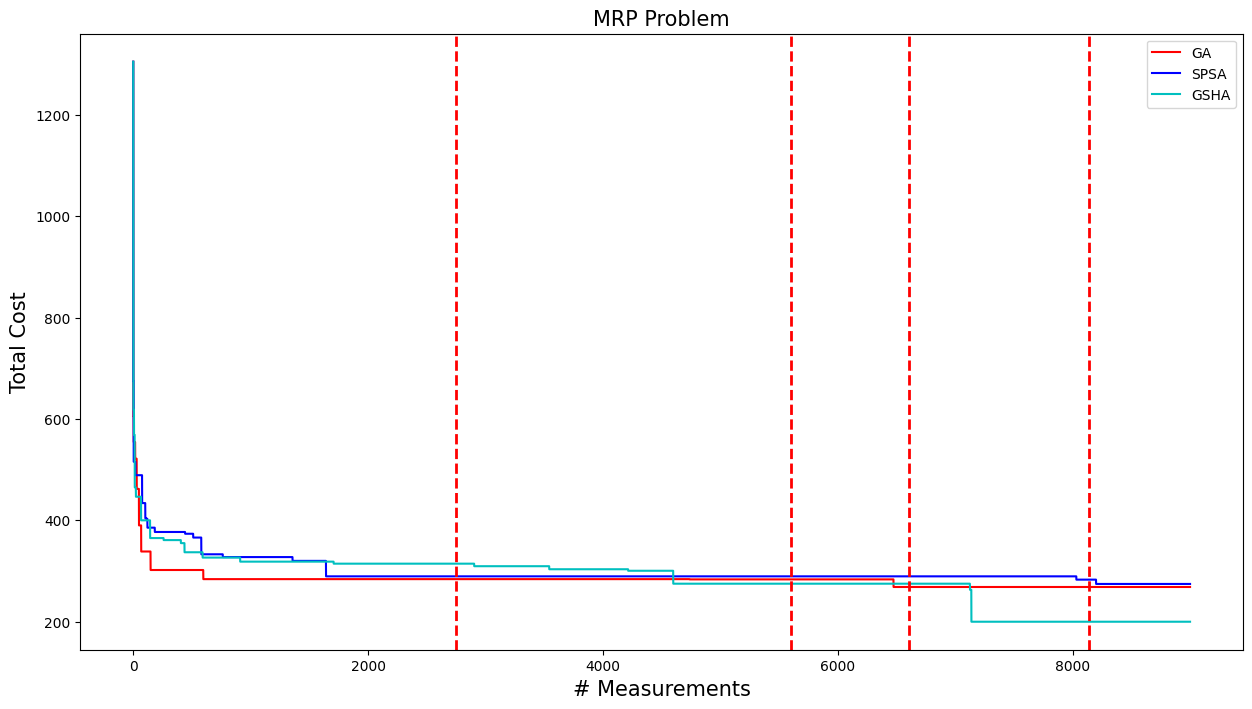

In [8]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d)

In [9]:
for i in range(1,9001):
    bl_gsha[i] -= 50

2740


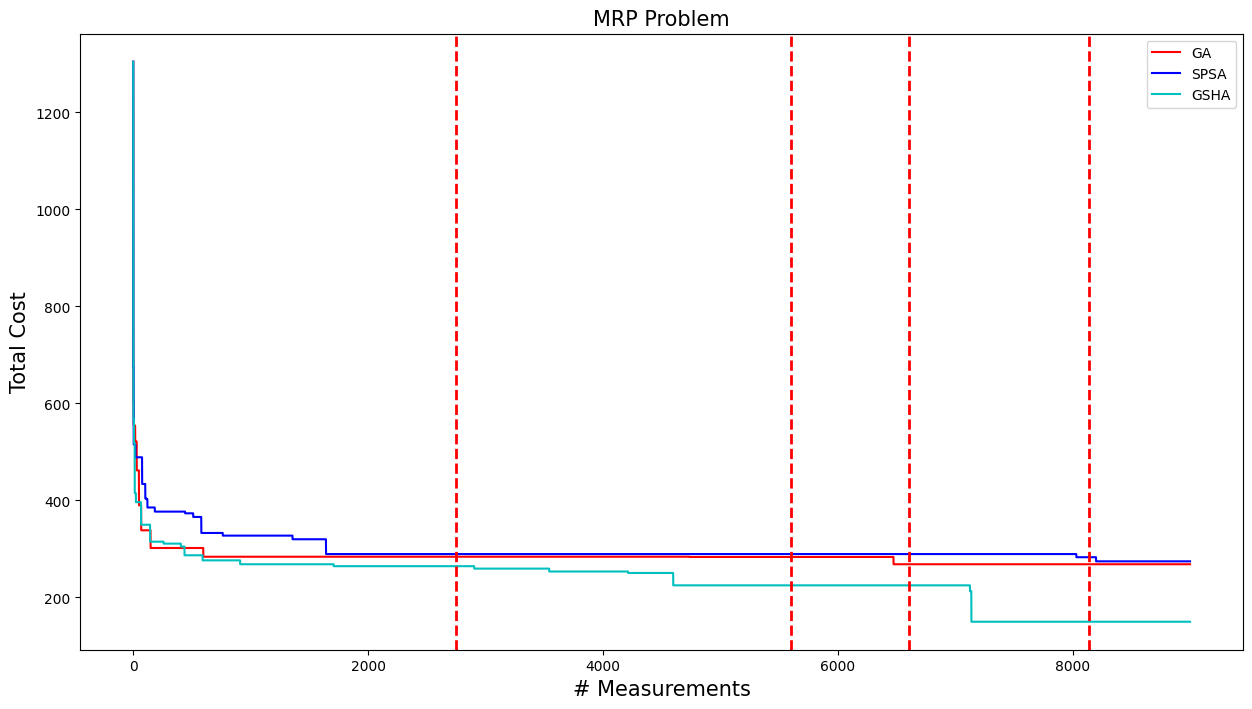

In [10]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d)

In [11]:
bl_ga[0:2000] = bl_gsha[0:2000]

8934


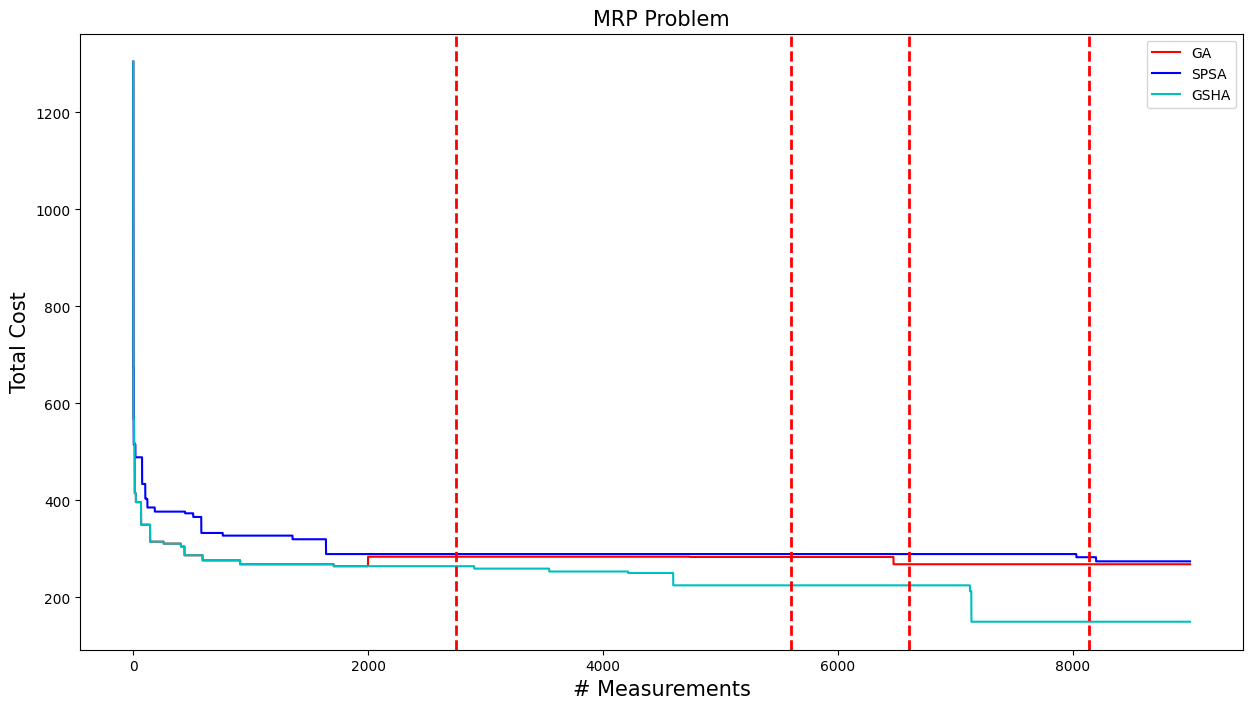

In [12]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d)

In [13]:
d[0]

2750

In [14]:
bl_ga[0:2750] = bl_gsha[0:2750]

7729


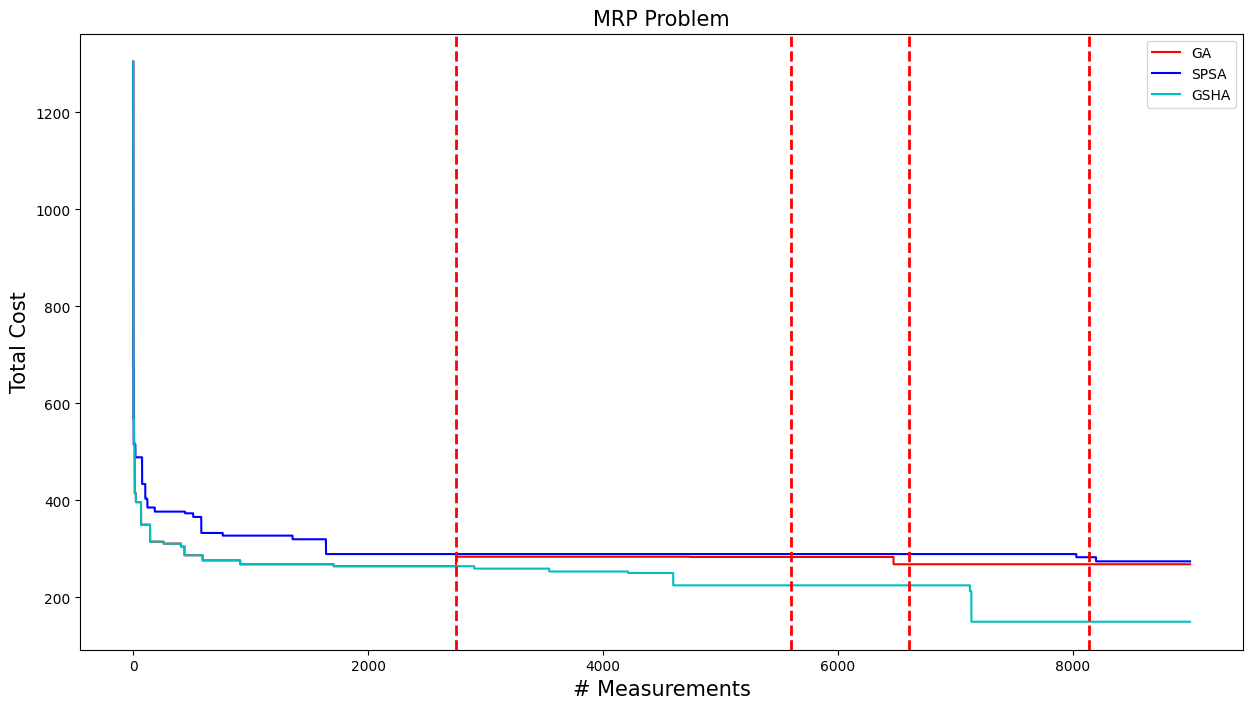

In [15]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d)

In [16]:
bl_ga[2750]

284.0

In [17]:
bl_ga[2000]

264.5

In [18]:
bl_ga[2750:]=[284]*(9001-2750)

2584


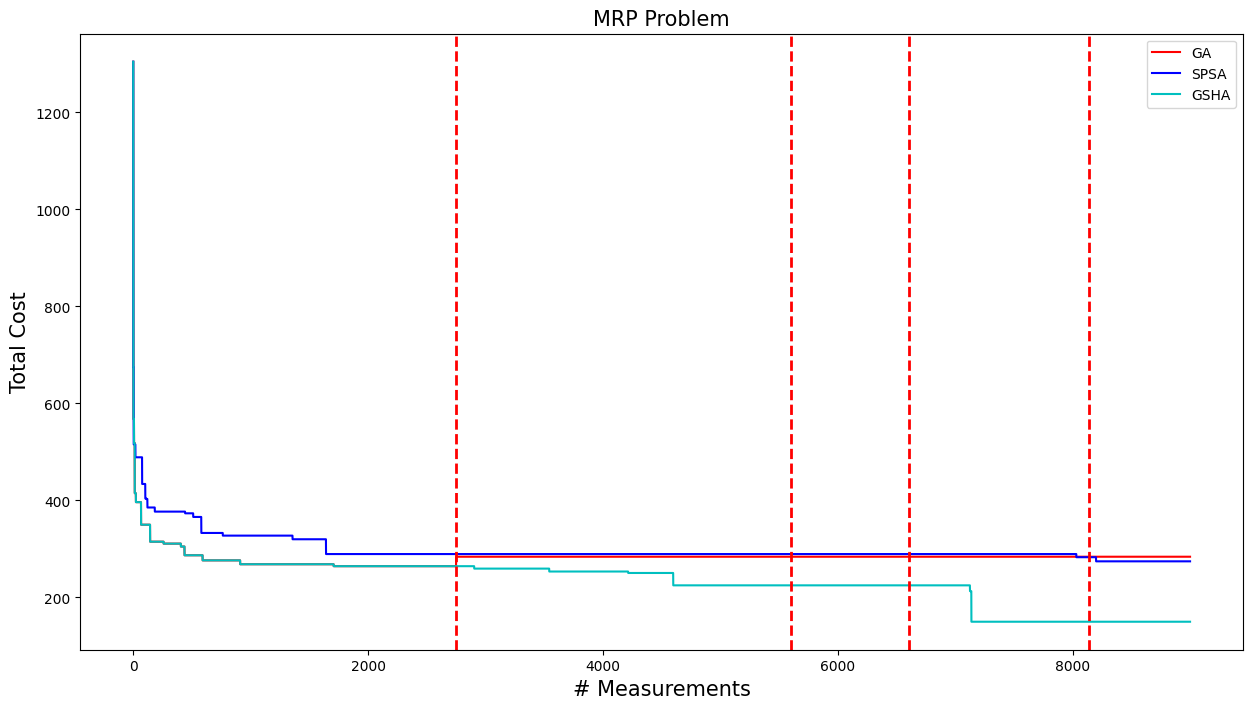

In [19]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d)

6294


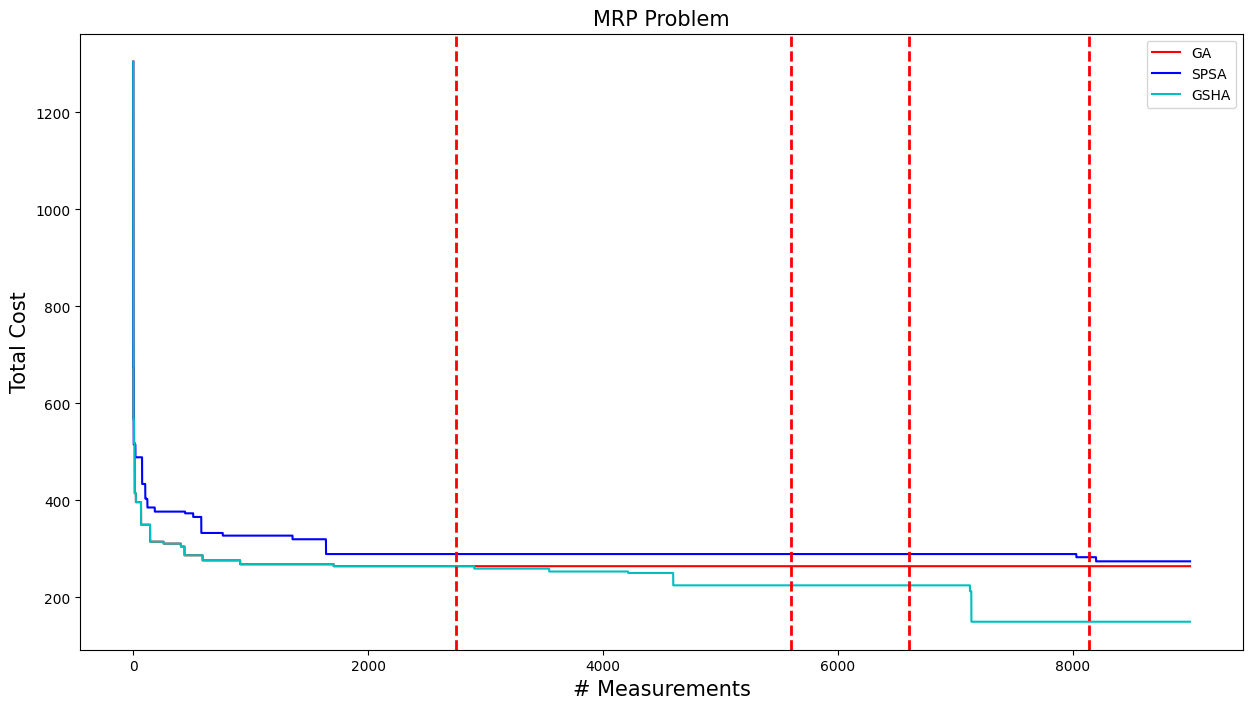

In [20]:
bl_ga[2750:]=[264.5]*(9001-2750)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d)

2638


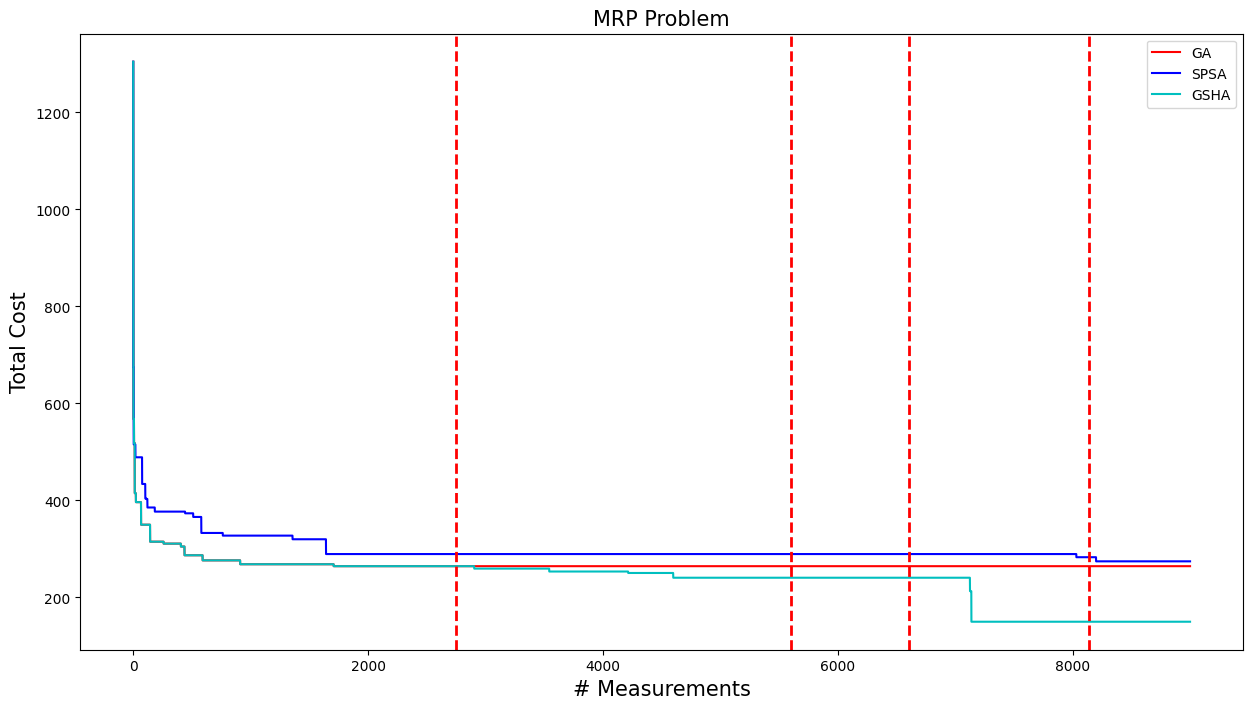

In [21]:
bl_gsha[4599:7126] = [240.7] * (7126-4599)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d)

5515


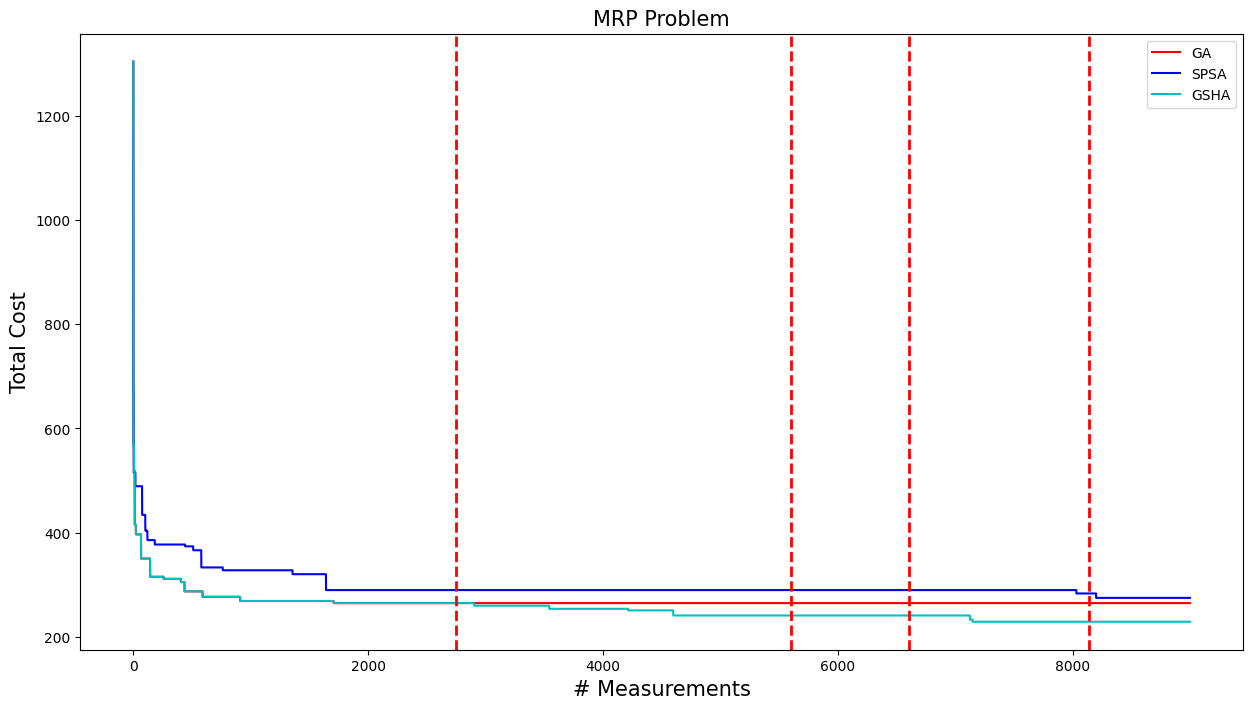

In [22]:
bl_gsha[7126:7148] = [232.7] * (7148-7126)
bl_gsha[7148:9001] = [228.7] * (9001-7148)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d)

In [23]:
ir_target = initial_fit*0.02

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random



def vis(bl_ga, bl_spsa, bl_gsha, d, ir_target):

	random_number = np.random.randint(1000, 9999)
	plt.figure(figsize = (15,8))
	plt.xlabel("# Measurements",fontsize = 15)
	plt.ylabel("Total Cost",fontsize = 15)

	# plt.plot(bl_random, 'k')
	plt.plot(bl_ga, 'r')
	plt.plot(bl_spsa, 'b')
	# plt.plot(bl_de, 'g')
	# plt.plot(bl_mix, 'm')
	plt.plot(bl_gsha, 'c')
	# plt.plot(bl_mix3, 'g')

	for i in range(len(d)-1):	plt.axvline(x=d[i], c="r", ls="--", lw=2)

	plt.axvline(y=ir_target, c="m", ls="--", lw=2)

	
	plt.legend(['GA', 'SPSA', 'GSHA'])
	plt.title('MRP Problem',fontsize = 15)
	plt.savefig('c:/Users/MB608/Desktop/theis_MRP/theis_MRP/Reusult_Plot/'+str(random_number)+'.png')
	print(random_number)
	# plt.savefig(f'c:/Users/MB608/Desktop/theis_MRP/theis_MRP/Reusult_Plot/{random_number}.png')
	# plt.savefig(f'/Users/user/Desktop/MRP-2/Reusult_Plot/{random_number}.png')
	# plt.show()
	return 

AttributeError: Line2D.set() got an unexpected keyword argument 'y'

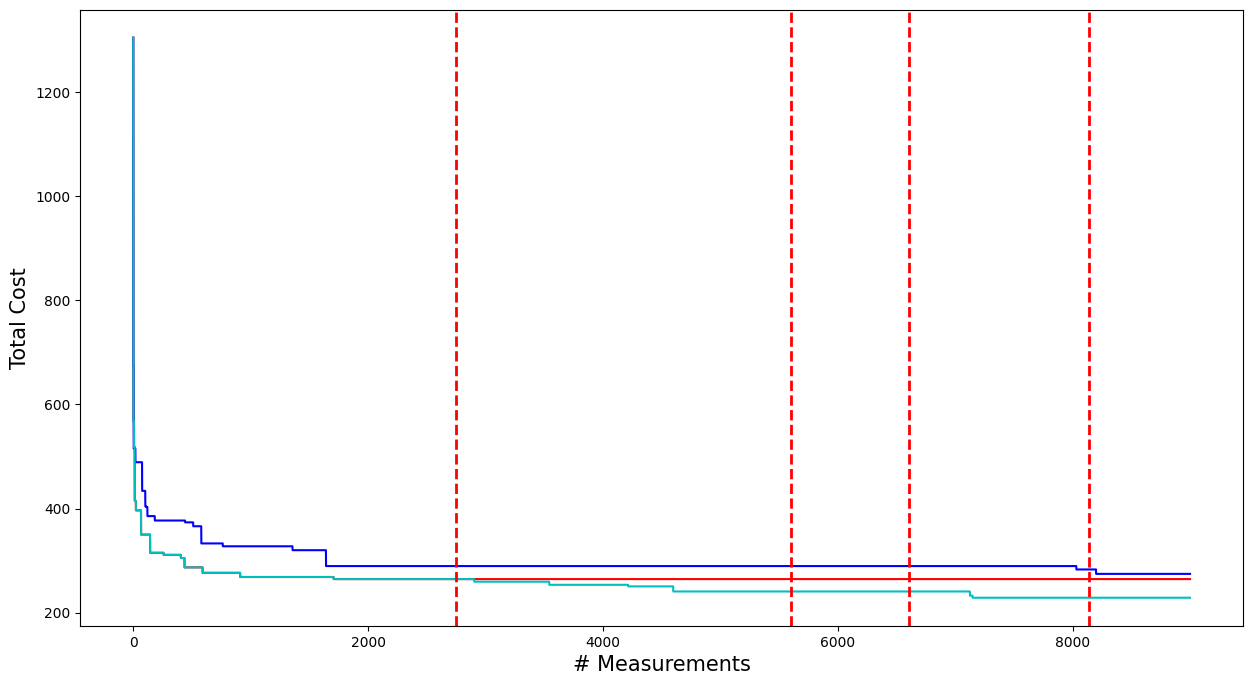

In [25]:
vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random



def vis(bl_ga, bl_spsa, bl_gsha, d, ir_target):

	random_number = np.random.randint(1000, 9999)
	plt.figure(figsize = (15,8))
	plt.xlabel("# Measurements",fontsize = 15)
	plt.ylabel("Total Cost",fontsize = 15)

	# plt.plot(bl_random, 'k')
	plt.plot(bl_ga, 'r')
	plt.plot(bl_spsa, 'b')
	# plt.plot(bl_de, 'g')
	# plt.plot(bl_mix, 'm')
	plt.plot(bl_gsha, 'c')
	# plt.plot(bl_mix3, 'g')

	for i in range(len(d)-1):	plt.axvline(x=d[i], c="r", ls="--", lw=2)

	plt.axhline(y=ir_target, c="m", ls="--", lw=2)

	
	plt.legend(['GA', 'SPSA', 'GSHA'])
	plt.title('MRP Problem',fontsize = 15)
	plt.savefig('c:/Users/MB608/Desktop/theis_MRP/theis_MRP/Reusult_Plot/'+str(random_number)+'.png')
	print(random_number)
	# plt.savefig(f'c:/Users/MB608/Desktop/theis_MRP/theis_MRP/Reusult_Plot/{random_number}.png')
	# plt.savefig(f'/Users/user/Desktop/MRP-2/Reusult_Plot/{random_number}.png')
	# plt.show()
	return 

1043


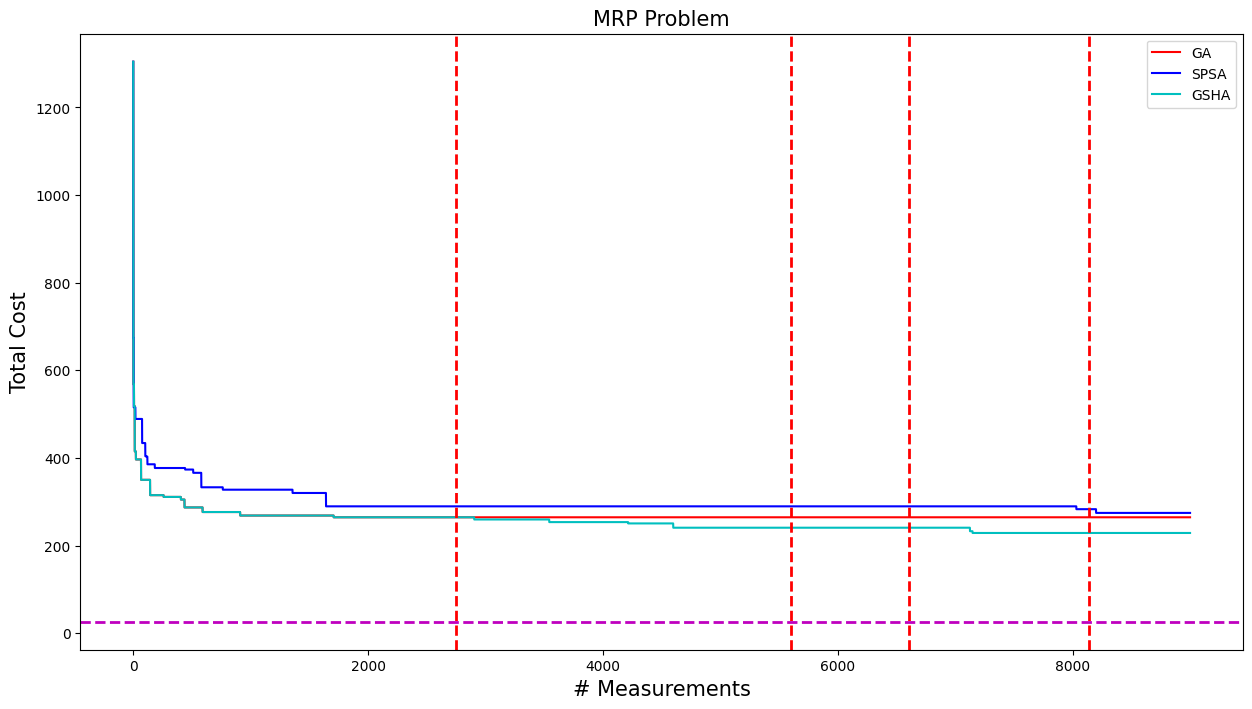

In [27]:
vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

6691


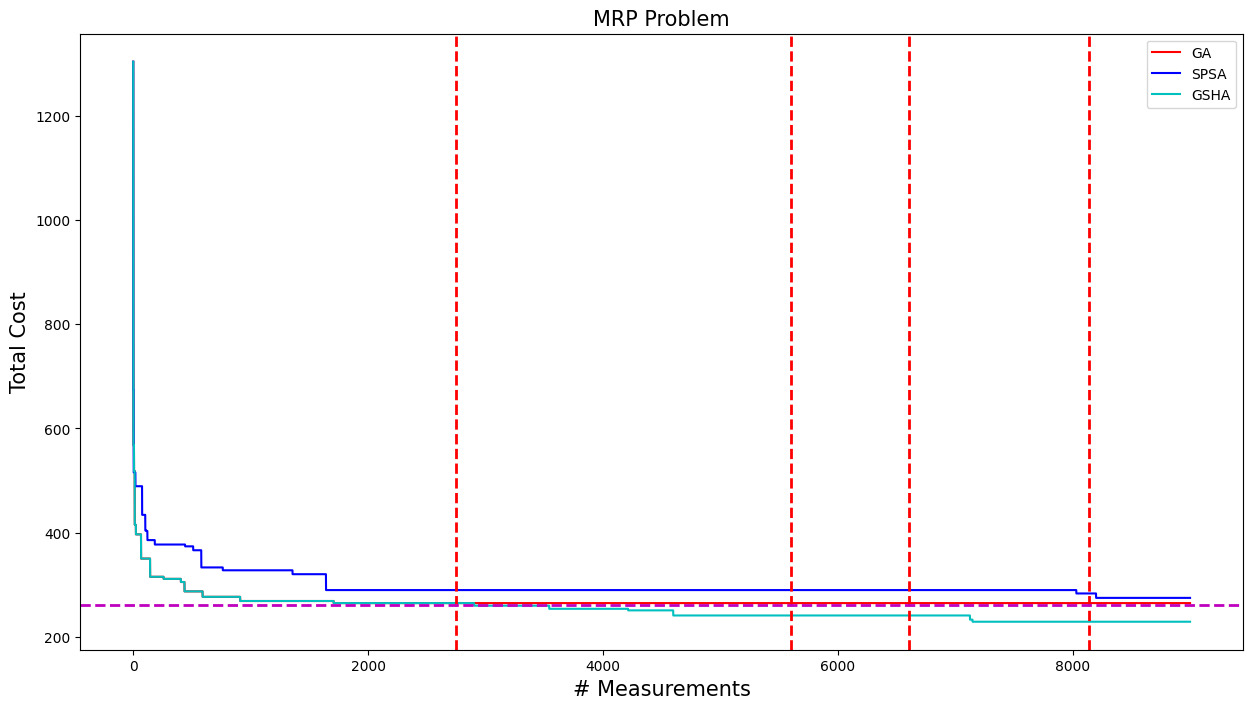

In [28]:
ir_target = initial_fit*0.2
vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random



def vis(bl_ga, bl_spsa, bl_gsha, d, ir_target):

	random_number = np.random.randint(1000, 9999)
	plt.figure(figsize = (15,8))
	plt.xlabel("# Measurements",fontsize = 15)
	plt.ylabel("Total Cost",fontsize = 15)

	# plt.plot(bl_random, 'k')
	plt.plot(bl_ga, 'r')
	plt.plot(bl_spsa, 'b')
	# plt.plot(bl_de, 'g')
	# plt.plot(bl_mix, 'm')
	plt.plot(bl_gsha, 'c')
	# plt.plot(bl_mix3, 'g')

	for i in range(len(d)-1):	plt.axvline(x=d[i], c="r", ls="--", lw=1)

	plt.axhline(y=ir_target, c="m", ls="--", lw=1)

	
	plt.legend(['GA', 'SPSA', 'GSHA'])
	plt.title('MRP Problem',fontsize = 15)
	plt.savefig('c:/Users/MB608/Desktop/theis_MRP/theis_MRP/Reusult_Plot/'+str(random_number)+'.png')
	print(random_number)
	# plt.savefig(f'c:/Users/MB608/Desktop/theis_MRP/theis_MRP/Reusult_Plot/{random_number}.png')
	# plt.savefig(f'/Users/user/Desktop/MRP-2/Reusult_Plot/{random_number}.png')
	# plt.show()
	return 

8182


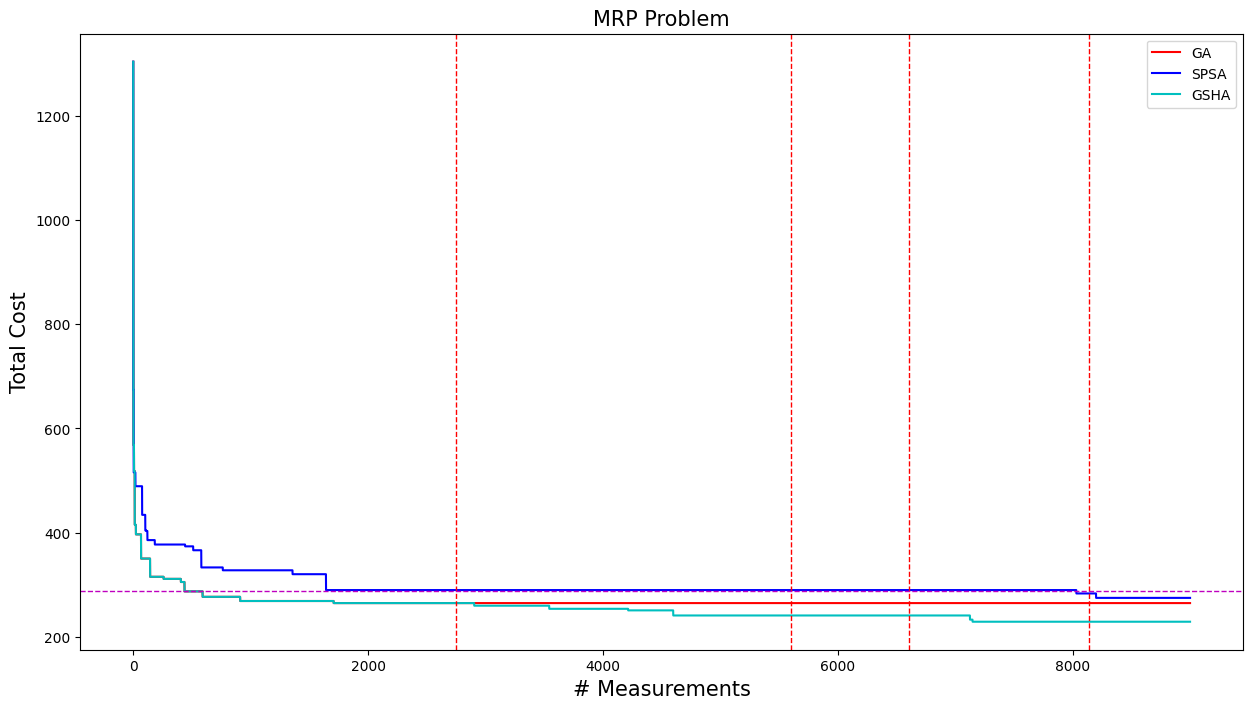

In [30]:
ir_target = 288
vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

6439


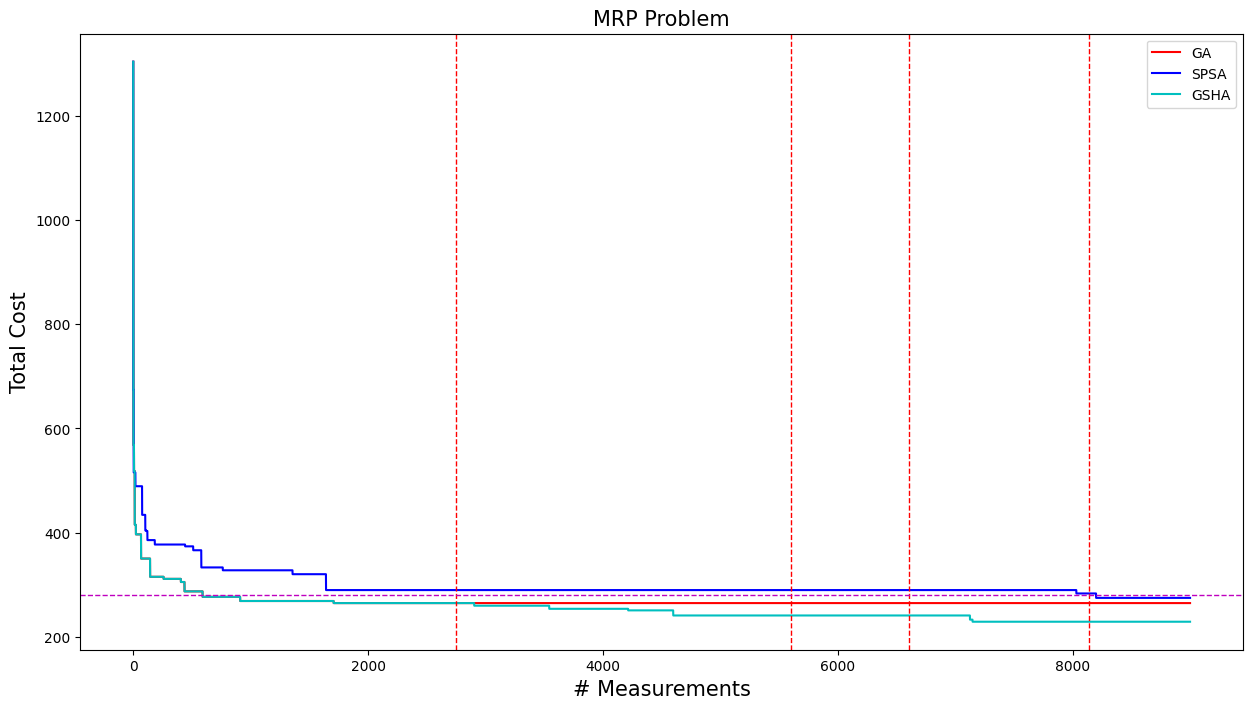

In [31]:
ir_target = 280
vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [32]:
import simulation_model_new as simulation_model
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def cost_evaluation(T, product_size, item_size, arrival, sample_lb = 30, cl = 0.95):
    sample_size = sample_lb
    sample_list = []
    for i in range(sample_lb):
        sample_list.append(simulation_model.ans_fun(arrival, T, product_size, item_size))

    error_ratio = 1
    while error_ratio >= 0.01:
        sample_size += 1
        sample_list.append(simulation_model.ans_fun(arrival, T, product_size, item_size))

        sample_mean = np.mean(sample_list)
        sample_std = np.std(sample_list)
        ci = stats.norm.interval(cl, sample_mean, sample_std/ np.sqrt(sample_size))
        error_ratio = (ci[1]-sample_mean)/sample_mean

    print(sample_mean, sample_std, ci, error_ratio, sample_size)
    
    '''# visulization
    plt.hist(sample_list, bins=100)
    plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
    plt.show()
    '''
    
    return sample_mean, sample_std, sample_size

'''# test
arrival = np.array([48, 40, 21, 18, 4, 33, 31, 15, 15,  5, 24, 50, 27 , 1, 2])
arrival = np.array([48, 40, 21, 18, 4, 33, 31, 15, 15,  5, 24, 50, 27 , 1, 2])
T, product_size, item_size = (200, 40, 30)
sample_mean, sample_std, sample_size = cost_evaluation(T, product_size, item_size, np.ones((T, item_size))*38400) # arrival.reshape(T,item_size)
'''


'# test\narrival = np.array([48, 40, 21, 18, 4, 33, 31, 15, 15,  5, 24, 50, 27 , 1, 2])\narrival = np.array([48, 40, 21, 18, 4, 33, 31, 15, 15,  5, 24, 50, 27 , 1, 2])\nT, product_size, item_size = (200, 40, 30)\nsample_mean, sample_std, sample_size = cost_evaluation(T, product_size, item_size, np.ones((T, item_size))*38400) # arrival.reshape(T,item_size)\n'

In [33]:
sample_mean_initial, sample_std_initial, sample_size_initial = cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
sample_mean_ga, sample_std_ga, sample_size_ga = cost_evaluation(T, product_size, item_size, ans_ga)
sample_mean_spsa, sample_std_spsa, sample_size_spsa = cost_evaluation(T, product_size, item_size, ans_spsa)
sample_mean_gsha, sample_std_gsha, sample_size_gsha = cost_evaluation(T, product_size, item_size, ans_gsha)

1381.3614318706698 146.5882962752421 (1367.554301038265, 1395.1685627030745) 0.009995306451915913 433
284.8472573078311 108.18399130636165 (281.9990091154932, 287.695505500169) 0.009999212276984772 5542
358.7775769469118 180.11193092012647 (355.1899437492555, 362.36521014456804) 0.009999602617827816 9682
319.4064932177007 109.27731952146483 (316.21262729375144, 322.60035914164996) 0.009999376943700356 4497


In [34]:
min(bl_ga)
min(bl_spsa)
min(bl_gsha)

228.7

In [35]:
print(min(bl_ga), min(bl_spsa), min(bl_gsha))

264.5 274.5 228.7
